# Feature Vector Calculations
The goal of this file is to be able to take in a sound observation (obtained from onset-/tempo-based windowing) and return a 1D vector that characterizes the sound. The different characteristics are listed in the Sound.py class.

In [2]:
import numpy as np
import librosa as lb
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.io as sio

In [103]:
sr_native = 44100 # Native audio sample rate
sr = int(sr_native/4) # Heavily downsampled for onset detection

In [233]:
audio1, sr1 = lb.load('rec1\scozier_rec1.wav', sr=sr_native)
audio2, sr2 = lb.load('rec1\scozier_rec1.wav', sr=int(sr_native/2))
audio4, sr4 = lb.load('rec1\scozier_rec1.wav', sr=int(sr_native/4))
audio10, sr10 = lb.load('rec1\scozier_rec1.wav', sr=int(sr_native/10))

In [262]:
def plotWave(audio, t=None, t0=0, title='', sr=sr, short=False):
    ''' Plot the time-energy waveform of a sound.
        
        @param t  time range for plotting, given as [t0, t1]
        @param short  toggles returning trimmed audio
    '''
    if t==None:
        start = 0
        end = len(audio)-1
    else:
        start = int(t[0]*sr)
        end = int(t[1]*sr)
        t0 = t[0]
        
        
    short_audio = audio[start:end]
    samples = np.arange(len(short_audio))
    time = samples/sr + t0
    
    plt.plot(time,short_audio)
    plt.title(title)
    plt.xlabel('Time (s)')
    
    if short: return short_audio

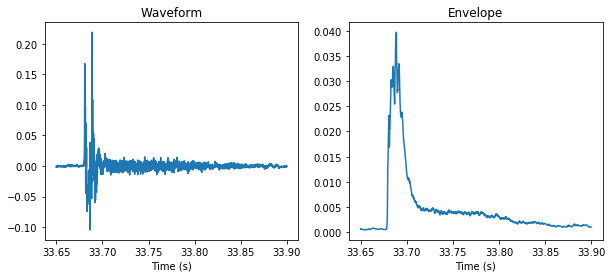

In [287]:
audio = audio4; sr = sr4

t = [33.65,33.9] 

plt.figure(1, figsize=[10,4])
plt.subplot(1,2,1)
short_audio = plotWave(audio4, t, short=True, title='Waveform')

sound_env = envelope(short_audio, M=20)

plt.subplot(1,2,2)
plotWave(sound_env, t0=t[0], title='Envelope')

plt.show()

In [252]:
def envelope(sound, M=70, sr=sr):
    ''' Generates 1-sided sound envelope based on simple moving averaging method. In order to track the sound
        onset better, the averaging window is biased towards the past data points, rather than centered
        around the current point.
    '''
    sound = np.abs(sound)
        
    for frame in np.arange(len(sound)):
        start = max(0,frame-2*M) # Bias window towards past data
        end = min(len(sound)-1, frame+M)
        sound[frame] = sum(sound[start:end])/(max(end-start,1)) 
    
    return sound    

In [98]:
ipd.Audio(short_audio, rate=sr)

In [ ]:
def calcADSR(sound, sr=sr):
    ''' sound is the time-energy representation (raw audio data)
        x variables are in samples, t variables are in seconds
        
        This function assumes that the sound has been windowed appropriately
        such that the first index is the beginning of the sound.
    '''
    
    x_peak = argmax(sound)
    
    attack = x_peak/sr
#     decay = (x_ss1-x_peak)/sr # Feasibility is questionable
#     sustain = (x_ss2-x_ss1)/sr # Feasibility is questionable
    release = (x_end-1-x_ss2)/sr